In [21]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni_gradient import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [22]:
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [23]:
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [24]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0
    for i in range (m):
        f_wb=w*x[i]+b
        dj_dw_i=(f_wb-y[i])*x[i] 
        dj_db_i=(f_wb-y[i])
        dj_dw+=dj_dw_i
        dj_db+=dj_db_i  
    dj_dw=dj_dw_i/m   #function derivative
    dj_db=dj_db_i/m   #function derivative
    
    return dj_dw, dj_db
        
        

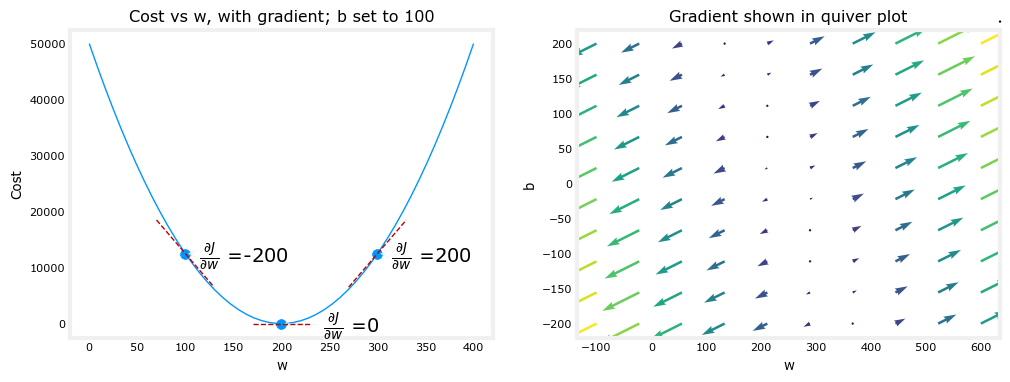

In [25]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [32]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    #Initialize the history of the cost and (w,b) after each iteration
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters): 
        dj_dw,dj_db= gradient_function(x,y,w,b) #function derivate

        #update the values of w and b
        b= b-alpha*dj_dw
        w= w- alpha*dj_db

        #save J and P after each iteration
        if i<100000:
            J_history.append(cost_function(x,y,w,b))
            P_history.append([w,b])

        #Print 10 times 
        if i% math.ceil(num_iters/10)==0:
            print(f"{i:4}: Cost{J_history[-1]:0.2e}",
                  f"dj_dw:{dj_dw:0.3e},dj_db:{dj_db:0.3e}",
                  f"w:{w:0.3e},b:{b:0.3e}")
    
    return w, b, J_history, p_history #return w and J,w history for graphing